In [1]:
from model import *
from neurons import *
from synaptics import *
from utils import *
from protocols import *
from shallow_models import *
from vis_functions import *
res = .1
plt.style.use(['dark_background'])

In [2]:
order = np.arange(10)
target = order.copy()
np.random.shuffle(order)
print(order, target)
snn = delayed_10_inputs()

[7 8 0 4 1 6 9 2 5 3] [0 1 2 3 4 5 6 7 8 9]


In [3]:
def order_learn(shallow_model, time=10000):
    snn = shallow_model
    for s in range(10):
        snn.syn_by_edge[s, 10].d_lr = 1
    for ne in range(10):
        snn[ne].change_props(awaiting_time=target[ne])
    delay = []
    dd = []
    delays = [[] for i in range(10)]
    dds = [[] for i in range(10)]
    gatherer = Gatherer(snn)
    t = np.arange(int(time/res)) * res
    for i in t:
        snn.tick()
        gatherer.gather_stats(gather_delay=False)
        for de in range(10):
            delays[de].append(snn.syn_by_edge[de,10].delay)
            dds[de].append(snn.syn_by_edge[de,10].dd)
        #delay.append(snn.syn_by_edge[0,3].delay)
        #dd.append(snn.syn_by_edge[0,3].dd)
    draw_stats_gatherer(*gatherer.get_stats(), t)
    return snn, delays, np.array(dds), t

0.24733868589386848 2.623526924487095
0.2734891510222165 2.623526924487095
0.2993803913123316 2.623526924487095
0.3310330883210142 2.623526924487095
0.3660323412732296 2.623526924487095
0.4088201744225497 2.623526924487095
0.45204365026647575 2.623526924487095
0.49983702989919926 2.623526924487095
0.5526834771623854 2.623526924487095
0.6111172395328653 2.623526924487095
0.17398982847626437 1.864155523030057
0.1923853128939674 1.864155523030057
0.21059844619672885 1.864155523030057
0.2328644629480063 1.864155523030057
0.257484606763949 1.864155523030057
0.2875836093668644 1.864155523030057
0.3179890638191438 1.864155523030057
0.35160920655802264 1.864155523030057
0.3887839180742273 1.864155523030057
0.4298890135238939 1.864155523030057
0.17224993019150173 1.8455139677997565
0.19046145976502774 1.8455139677997565
0.20849246173476157 1.8455139677997565
0.23053581831852624 1.8455139677997565
0.25490976069630955 1.8455139677997565
0.28470777327319574 1.8455139677997565
0.31480917318095236 1

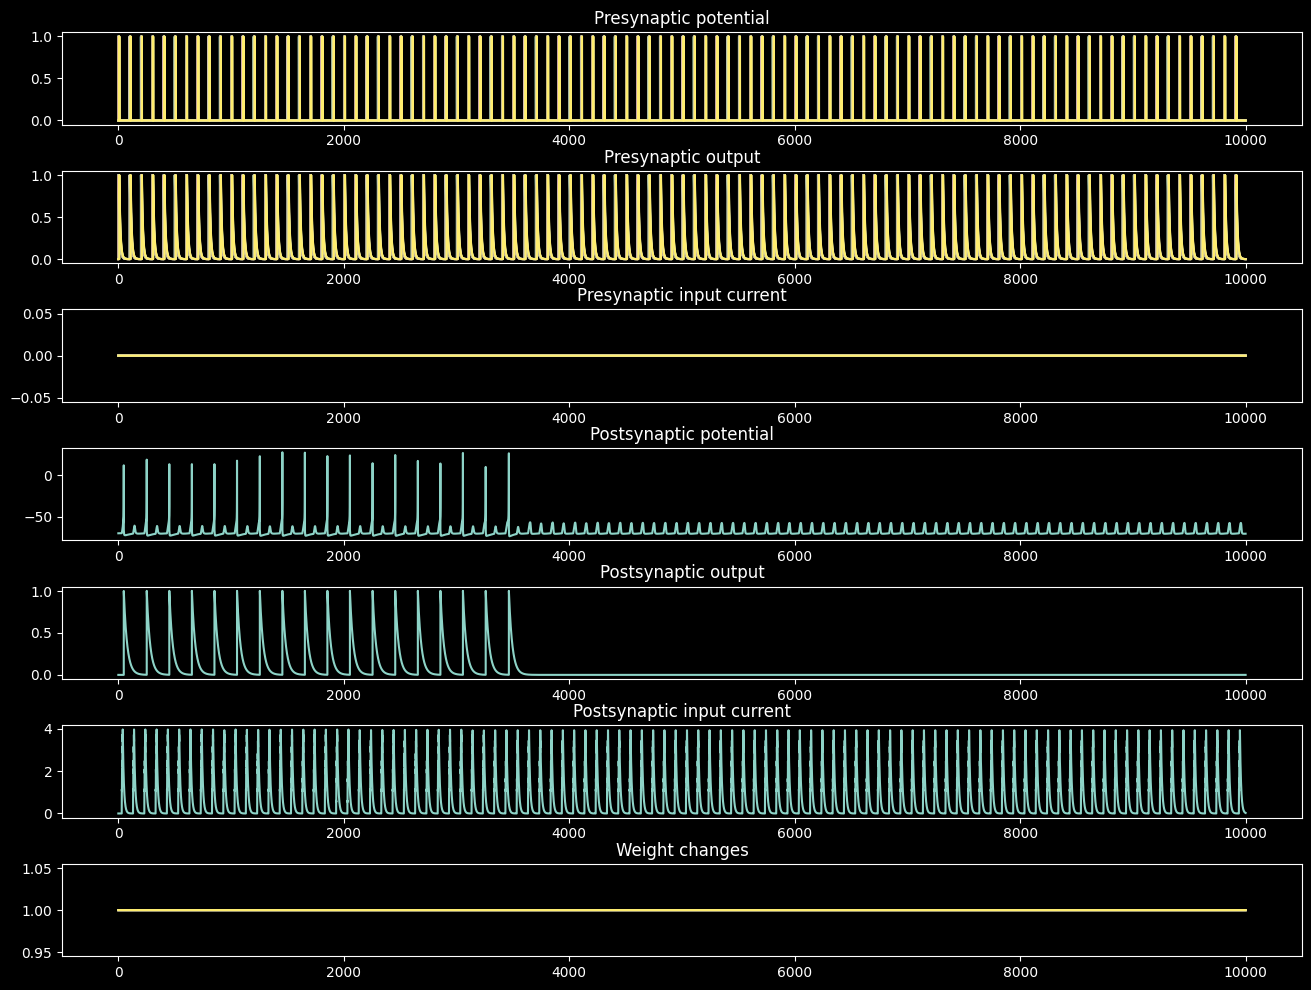

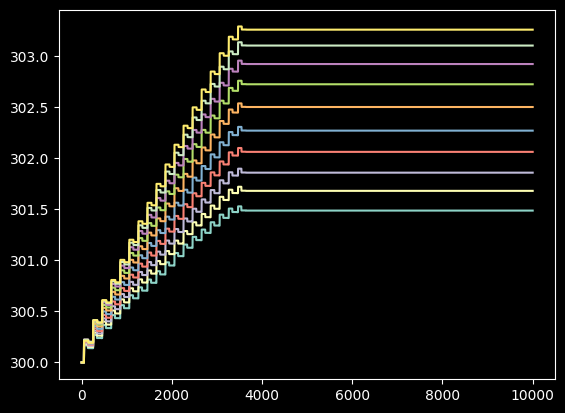

In [4]:
snn, delay, dd, total_time = order_learn(snn)
plt.figure()
for i in range(10):
    plt.plot(total_time, delay[i])
plt.show()

In [5]:
def order_protocol(shallow_model, time=1000, num_trials=20):
    snn = shallow_model
    for s in range(10):
        snn.syn_by_edge[s, 10].d_lr = 0
    delay = []
    dd = []
    gatherer = Gatherer(snn)
    total_time = np.arange(int((time * num_trials) / res)) * res
    delays = [[] for i in range(10)]
    dds = [[] for i in range(10)]
    t = np.arange(int(time/res))
    for trial in range(num_trials):
        np.random.shuffle(order)
        for ne in range(10):
            snn[ne].change_props(awaiting_time=order[ne])
        for i in t:
            snn.tick()
            gatherer.gather_stats(gather_delay=False)
            for de in range(10):
                delays[de].append(snn.syn_by_edge[de,10].delay)
                dds[de].append(snn.syn_by_edge[de,10].dd)
    draw_stats_gatherer(*gatherer.get_stats(), total_time)
    return snn, np.array(delays), np.array(dds), total_time

0.2875836093668644 1.734336781853246
0.32120107456479174 1.734336781853246
0.23521662924041042 1.734336781853246
0.15894270919978784 1.734336781853246
0.3551608147050734 1.734336781853246
0.21272570322901904 1.734336781853246
0.3966778064220256 1.734336781853246
0.2653662497477056 1.734336781853246
0.19432859888279536 1.734336781853246
0.17752252675876376 1.734336781853246
0.324445529863426 1.9566407744475576
0.3587482976818923 1.9566407744475576
0.2653662497477056 1.9566407744475576
0.17931568359471087 1.9566407744475576
0.400684652951541 1.9566407744475576
0.2399924795841347 1.9566407744475576
0.447523213763811 1.9566407744475576
0.2993803913123316 1.9566407744475576
0.21923726936647264 1.9566407744475576
0.20027702685748966 1.9566407744475576
0.32772275743780405 1.9764048226743
0.3623720178604973 1.9764048226743
0.2653662497477056 1.9764048226743
0.18112695312597057 1.9764048226743
0.4047319726783242 1.9764048226743
0.2424166460445805 1.9764048226743
0.447523213763811 1.976404822674

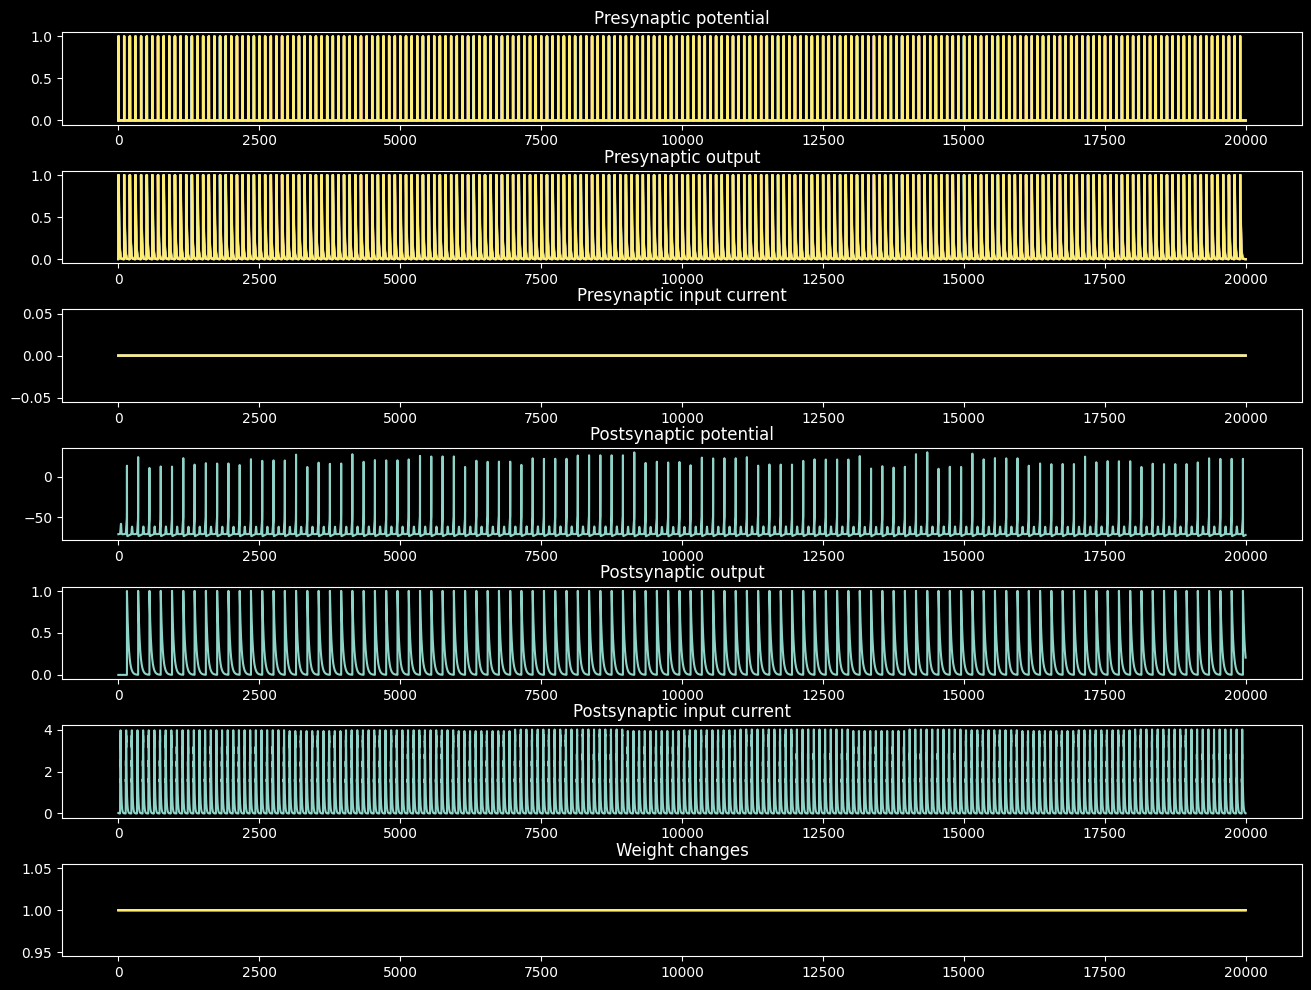

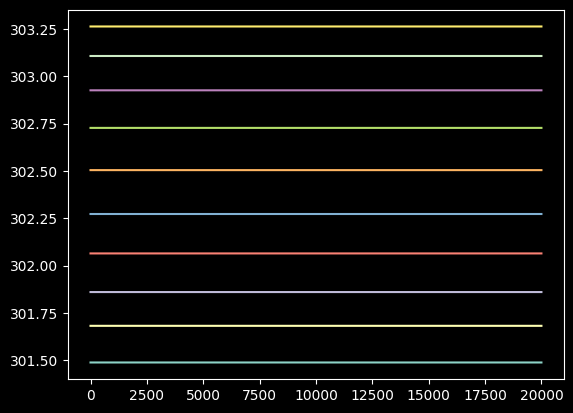

In [6]:
snn, delay, dd, total_time = order_protocol(snn)
plt.figure()
for i in range(10):
    plt.plot(total_time, delay[i])
plt.show()

In [7]:
print(delay[1])

[301.6822507 301.6822507 301.6822507 ... 301.6822507 301.6822507
 301.6822507]


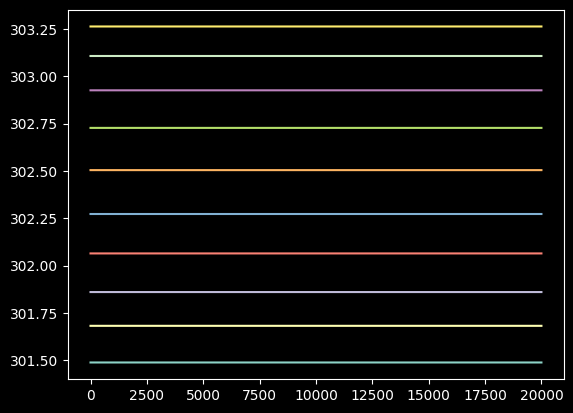

In [8]:
plt.figure()
for i in range(10):
    plt.plot(total_time, delay[i])
plt.show()

0.09237216435585824 1.198981171151946
0.103170130301577 1.198981171151946
0.1129372549733108 1.198981171151946
0.12487781225895182 1.198981171151946
0.13808081308747308 1.198981171151946
0.15422195179384496 1.198981171151946
0.17224993019150173 1.198981171151946
0.19046145976502774 1.198981171151946
0.21059844619672885 1.198981171151946
0.2328644629480063 1.198981171151946


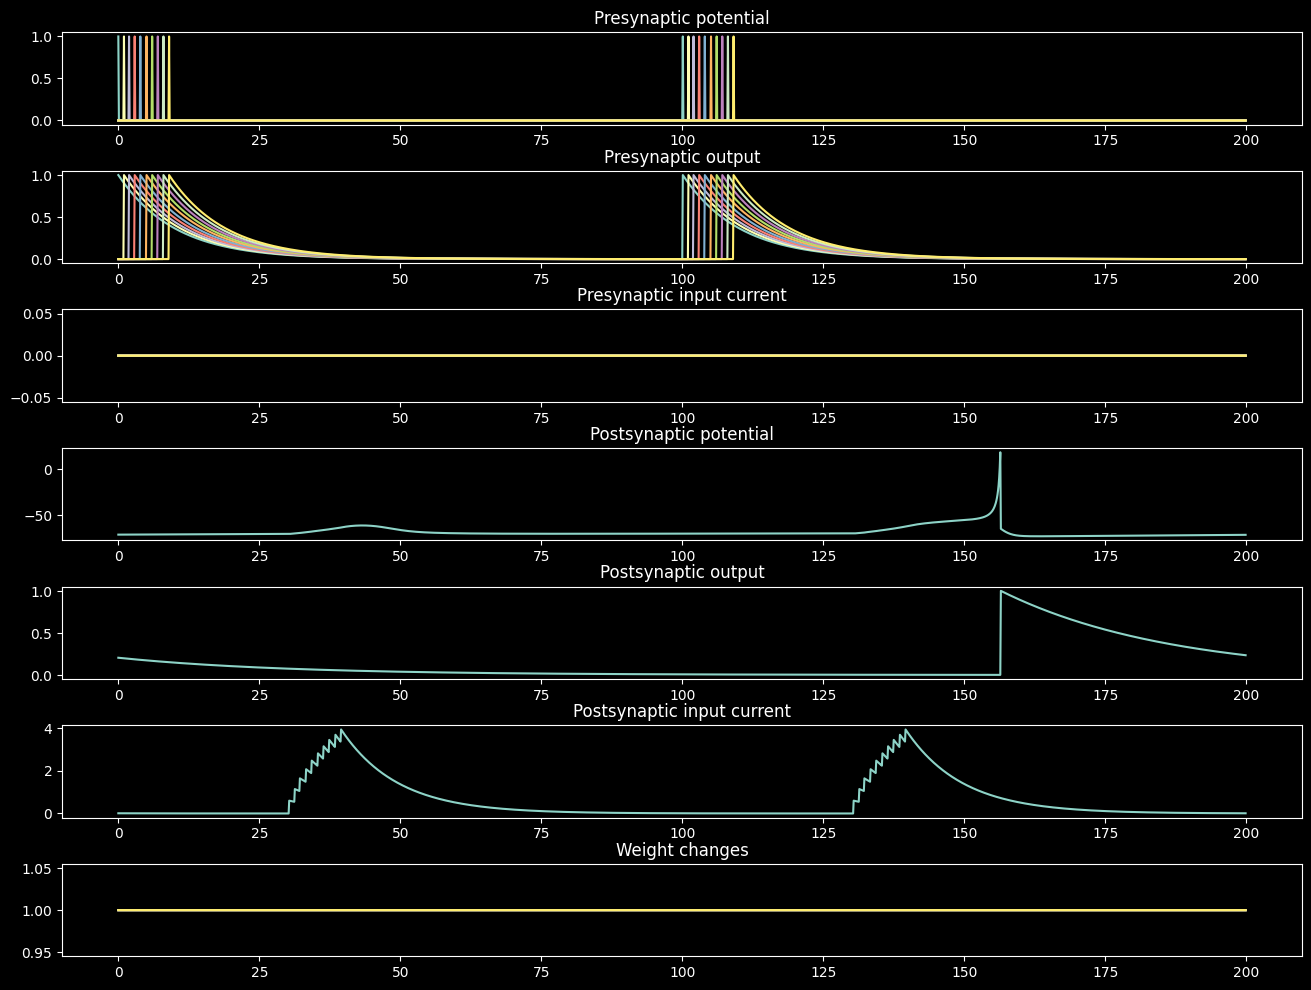

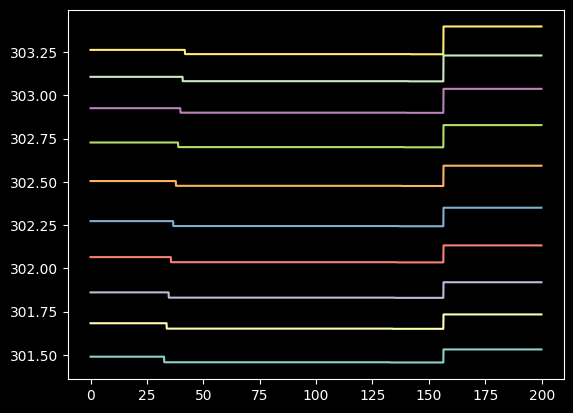

In [9]:
snn, delay, dd, total_time = order_learn(snn, time=200)
plt.figure()
for i in range(10):
    plt.plot(total_time, delay[i])
plt.show()